# Regression and Insights

The *universal approximation theorem* (Balázs Csanád Csáji (2001) Approximation with Artificial Neural Networks; Faculty of Sciences; Eötvös Loránd University, Hungary) states that any continuous function on a compact set can be approximated to arbitrary accuracy by a two layer neural network with one set of hidden neurons, provided there are enough hidden neurons. Compactness is an important prerequisite. Time series are by definition not functions on a compact set, because the interval is open in the future direction. The problem with time is that it keeps going in only one direction.

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simple Neural Network class
We illustrate this with a simple two layer neural network with one input neuron and one output neuron and three neurons in the set of hidden neurons. One input neuron and one output neuron means that the function is univariate from $\mathbb{R}^1$ to $\mathbb{R}^1$. The neural network can be evaluated for any input. The bias is incorporated in dummy neurons which always have the value 1.

### Forward propagation

The activations of the hidden neurons are calculated as
\begin{equation}
\left( \begin{array}{c} a_1 \\ a_2 \\ a_3 \end{array} \right) = \left( \begin{array}{ccc} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \end{array} \right) \left( \begin{array}{c} x \\ 1 \end{array} \right).
\end{equation}
The latent variables in the hidden neurons are then
\begin{equation}
\left( \begin{array}{c} z_1 \\ z_2 \\ z_3 \end{array} \right) = \left( \begin{array}{c} h(a_1) \\ h(a_2) \\ h(a_3) \end{array} \right),
\end{equation}
where $h$ is the activation function. The activation of the output neuron is
\begin{equation}
a = \left( \begin{array}{ccc} w_1 & w_2 & w_3 & w_4 \end{array} \right) \left( \begin{array}{c} z_1 \\ z_2 \\ z_3 \\ 1 \end{array} \right)
\end{equation}
and the output is calculated as $y = a$, since in regression the identity function is used as activation function in the output.

### Training
The prediction error is $\delta = y-t$, where $t$ is the target. Training consists of minimizing a cost function $E$ which is calculated across all training data. Algorithmically, this minimization becomes the same for standard tasks (classification and regression) when the standard cost functions are used. (Note: care has to be taken when cost functions are modified). The negative gradient (derivative with respect to all weights) at a point on the cost function points in the direction of steepest descent. The minimization is performed by taking a step in this direction and adjusting the weights by this step. The step size is given by the learning rate $\eta$, too small and the convergence is slow, too large and we might overshoot the minimum.

### Backward error propagation

The error is $\delta$ gets propagated back to the hidden neurons by
\begin{equation}
\left( \begin{array}{c} \delta_1 \\ \delta_2 \\ \delta_3 \end{array} \right) = \delta \left( \begin{array}{c} h'(a_1) w_1 \\ h'(a_2) w_2 \\ h'(a_3) w_3 \end{array} \right).
\end{equation}

The derivatives of $E$ with respect to the weights are
\begin{equation}
\left( \begin{array}{ccc} \frac{\partial}{\partial w_1} & \frac{\partial}{\partial w_2} & \frac{\partial}{\partial w_3} & \frac{\partial}{\partial w_4} \end{array} \right) E = \delta \left( \begin{array}{ccc} z_1 & z_2 & z_3 & 1 \end{array} \right)
\end{equation}
and
\begin{equation}
\left(\begin{array}{ccc} \frac{\partial}{\partial w_{11}} & \frac{\partial}{\partial w_{12}} \\ \frac{\partial}{\partial w_{21}} & \frac{\partial}{\partial w_{22}} \\ \frac{\partial}{\partial w_{31}} & \frac{\partial}{\partial w_{32}} \end{array} \right) E = \left( \begin{array}{c} \delta_1 \\ \delta_2 \\ \delta_3 \end{array} \right) \left( \begin{array}{ccc} x & 1 \end{array} \right).
\end{equation}

After seeing one training sample, the weights are updated by
\begin{equation}
\left( \begin{array}{ccc} w_1 & w_2 & w_3 & w_4 \end{array} \right) = \left( \begin{array}{ccc} w_1 & w_2 & w_3 & w_4 \end{array} \right) -  \eta \delta \left( \begin{array}{ccc} z_1 & z_2 & z_3 & 1 \end{array} \right)
\end{equation}
and
\begin{equation}
\left( \begin{array}{ccc} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \end{array} \right) = \left( \begin{array}{ccc} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \end{array} \right) -  \eta \left( \begin{array}{c} \delta_1 \\ \delta_2 \\ \delta_3 \end{array} \right) \left( \begin{array}{ccc} x & 1 \end{array} \right).
\end{equation}

Using one training sample at a time, is known as *online* or *sequential* learning. Updating in one step using several training samples is known as *batch* or *mini-batch* methods.

## Activation function
### Hyperbolic tangent aka tan-sigmoid
The hyperbolic tangent is defined as
\begin{equation}
y = \tanh(x) = \frac{\exp(2x) - 1}{\exp(2x) + 1} = \frac{2}{1 + \exp(-2x)} -1.
\end{equation}
The derivative is
\begin{equation}
\tanh'(x) = \frac{4\exp(-2x)}{(1 + \exp(-2x))^2} = 1-  \tanh^2(x) = 1-y^2
\end{equation}
This will be used as activation function in the hidden neurons. The interpretation is that the neuron reacts positively to positive values and negatively to negative values. Around zero is a transition zone between the two states. The size of the transition zone can be changed by multiplying $x$ by a positive number. The larger this number the faster the transition.

In [2]:
def hyptan(x):
    return 2 / (1 + np.exp(-2*x)) -1
def hyptan_derivative(y):
    return 1 - y**2

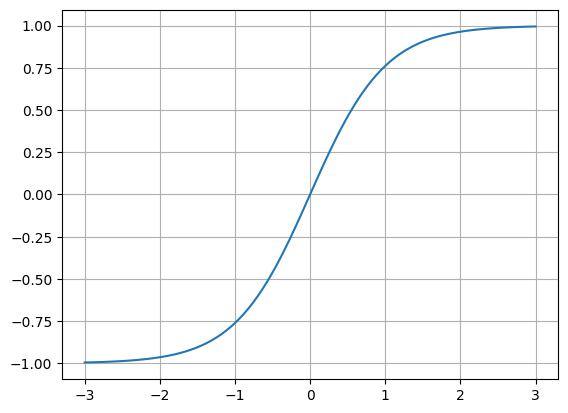

In [3]:
x = np.linspace(-3,3,100)
y = hyptan(x)
fig = plt.figure()
plt.plot(x,y)
plt.grid(True)
plt.show()

In [4]:
class NeuralNetwork:

    def __init__(self,
                 nin,     # number of input neurons
                 nout,    # number of output neurons
                 nhidden, # number of hidden neurons
                 tol,     #tolerance
                 nepoch,  # number of epochs
                 rate):   # learning rate
        self.nin = nin
        self.nout = nout
        self.nhidden = nhidden
        self.tol = tol
        self.nepoch = nepoch
        self.rate = rate
        self.init_weights()

    def init_weights(self):  # He et al.(2015) initialization
        # + 1 is the bias neuron
        self.weights_in = np.random.randn(self.nhidden, self.nin+1) * np.sqrt(2/self.nin)
        self.weights_out = np.random.randn(self.nout, self.nhidden+1) * np.sqrt(2/self.nhidden)

    def predict(self, X): # X row vectors
        # Append bias and multiply with weights.
        Y = self.weights_in @ np.append(X.T,np.ones((1,X.shape[0])), axis = 0)
        # Apply activation function to calculate latent variables.
        self.Z = hyptan(Y)
        # Append bias and multiply with weights.
        Y = self.weights_out @ np.append(self.Z,np.ones((1,self.Z.shape[1])), axis =0)
        return Y.T

    def train(self, X, target):
        # Permute the training data.
        perm = np.random.permutation(X.shape[0])
        # Append bias, multiply with weights and apply activation function.
        Z = hyptan(self.weights_in @ np.append(X[perm,:].T,np.ones((1,X.shape[0])), axis = 0))
        Y = self.weights_out @ np.append(Z,np.ones((1,Z.shape[1])), axis =0)
        # Errors for all training samples.
        Y_errors = Y - target[perm].T
        cost = 0.5 * np.sum(Y_errors**2)
        epoch = 0
        while cost > self.tol and epoch < self.nepoch:
            epoch = epoch+1
            # Propagate errors.
            # Note first multiplication componentwise, second matrix multiplication.
            # Using special property of sigmoid derivative.
            Z_errors = hyptan_derivative(Z) * (self.weights_out[:,:-1].T @ Y_errors)
            # Update weights in second layer.
            self.weights_out = self.weights_out - self.rate * Y_errors @ np.append(Z,np.ones((1,Z.shape[1])), axis =0).T
            # Update weights in first layer.
            self.weights_in = self.weights_in - self.rate * Z_errors @ np.append(X[perm,:],np.ones((X.shape[0],1)), axis = 1)
            # Permute the training data.
            perm = np.random.permutation(X.shape[0])
            # Append bias, multiply with weights and apply activation function.
            Z = hyptan(self.weights_in @ np.append(X[perm,:].T,np.ones((1,X.shape[0])), axis = 0))
            Y = self.weights_out @ np.append(Z,np.ones((1,Z.shape[1])), axis =0)
            # Errors for all training samples.
            Y_errors = Y - target[perm].T
            cost = 0.5 * np.sum(Y_errors**2)
        return epoch

## Example function

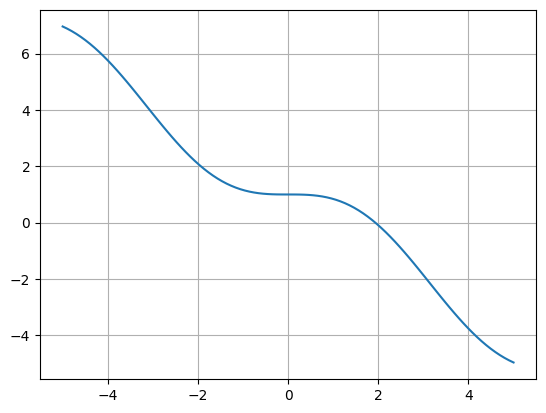

In [5]:
X = np.linspace(-5,5,100).reshape(-1,1)
Y = 1 - X + np.sin(X)
fig = plt.figure()
plt.plot(X,Y)
plt.grid(True)
plt.show()

## Initialize neural network
Run this code several times and note that each run produces a different function which is smooth.

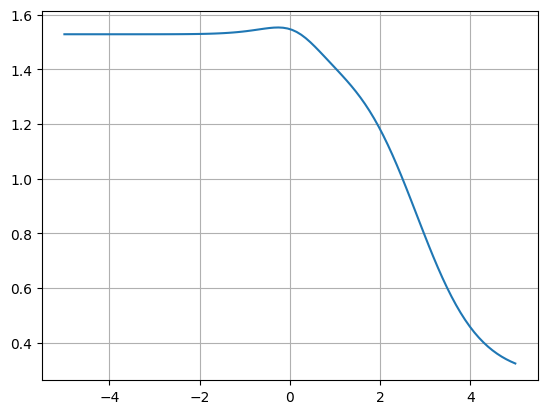

In [6]:
NN = NeuralNetwork(nin=1, nout=1, nhidden=3, tol = 0.1, nepoch=20000, rate=0.001)
fig = plt.figure()
plt.plot(X,NN.predict(X))
plt.grid(True)
plt.show()

## Train neural network
The performance of the training as well as the prediction depends on the random initialization of the neural network above, the number and distribution of training data samples, the learning rate, the convergence tolerance and number of epochs.

Epochs until convergence: 1977


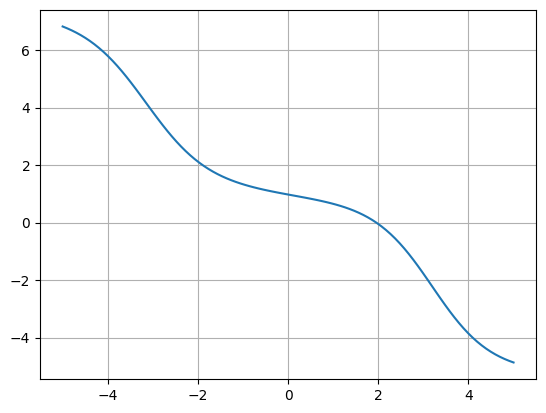

In [7]:
# 20 random training samples
# choice = np.random.choice(np.arange(X.size),20)
# train = X[choice]
# target = Y[choice]
# 20 equally spaced training samples
train = X[0::5]
target = Y[0::5]
print('Epochs until convergence:', NN.train(train,target))
fig = plt.figure()
plt.plot(X,NN.predict(X))
plt.grid(True)
plt.show()

## Insights
The predictions of the neural network are a linear combination of the latent variables in the hidden neurons. These latent variables can therefore be interpreted as the bulding blocks building the model. We can visualize these building blocks together with their factor in the linear combination.

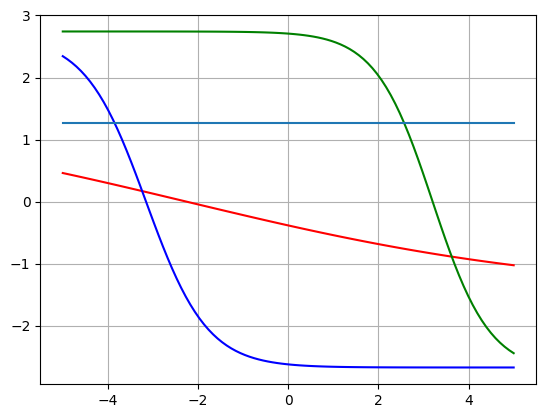

In [8]:
fig = plt.figure()
plt.plot(X, NN.weights_out[0,0] * NN.Z[0],'r-')
plt.plot(X, NN.weights_out[0,1] * NN.Z[1],'b-')
plt.plot(X, NN.weights_out[0,2] * NN.Z[2],'g-')
plt.plot(X, NN.weights_out[0,3] * np.ones_like(X))
plt.grid(True)
plt.show()

## Interpretation
We can repeat the process on the same data several times. While each run produces a prediction similar to the original function, looking at the building blocks it is clear that the neural network has not discovered any intrinsic truth in the data. It has shown that there are many different explanations for the data even if the complexity of the model is restrcited by only 3 hidden neurons.

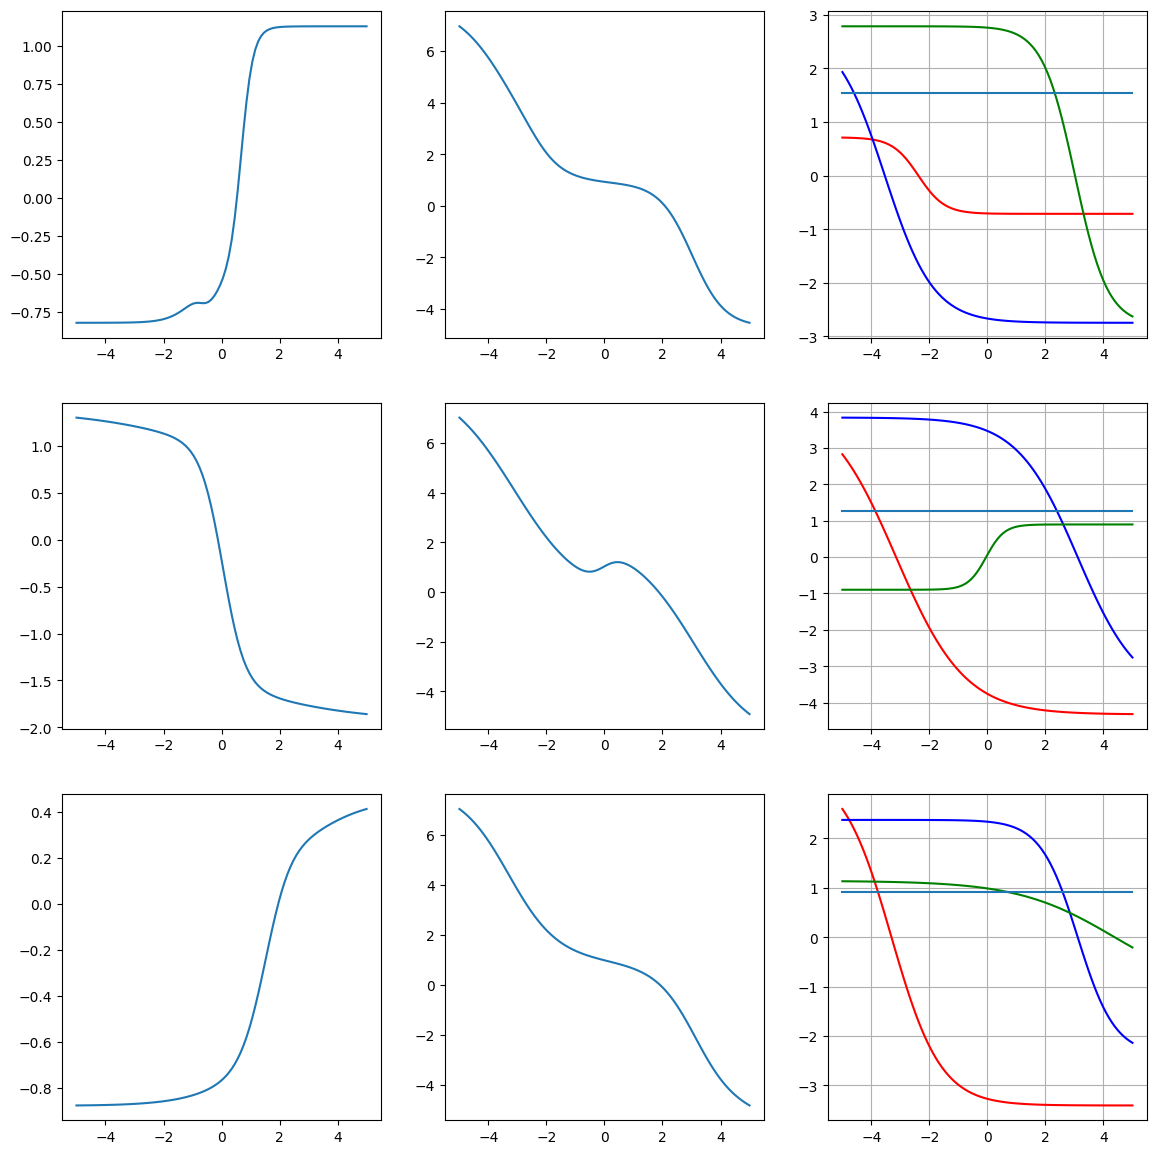

In [9]:
rows = 3
cols = 3
fig = plt.figure(figsize=(14,rows*4.8))
for i in range(rows):
    NN = NeuralNetwork(nin=1, nout=1, nhidden=3, tol = 0.1, nepoch=20000, rate=0.001)
    ax = fig.add_subplot(rows, cols, i*3+1)
    ax.plot(X,NN.predict(X))
    NN.train(train,target)
    ax = fig.add_subplot(rows, cols, i*3+2)
    ax.plot(X,NN.predict(X))
    ax = fig.add_subplot(rows, cols, i*3+3)
    ax.plot(X, NN.weights_out[0,0] * NN.Z[0],'r-')
    ax.plot(X, NN.weights_out[0,1] * NN.Z[1],'b-')
    ax.plot(X, NN.weights_out[0,2] * NN.Z[2],'g-')
    ax.plot(X, NN.weights_out[0,3] * np.ones_like(X))
    ax.grid(True)
plt.show()